In [ ]:
!python -m pip install https://github.com/slundberg/shap/archive/f3369c7.zip
!pip install eli5

     / 169.5MB 556kB/s
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=395333 sha256=c9e0b9c0ebb832bf5faf2ec4a355cb745175f9acb6763089376882031b24a8b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4fdqhxlo/wheels/45/88/33/e04d1dc452e350217e7ea531bf4af01204c4dc26fab046209e
Successfully built shap
     |████████████████████████████████| 112kB 6.0MB/s 


##1.1- Please describe the problem, along with how you imported the environment, providing snippets of code and/or detailed description.

Cervical cancer threatens women worldwide every day, it is the fourth most common cancer for women, where an estimated of 570.000 women were diagnosed with cervical cancer in 2018, and 311.000 women died from this disease in the same year [1]. Detecting early signs of cervical cancer can help predict if a woman will be diagnosed with the disease in the future and therefore early detections of signs will increase the chance to fight the disease in a more efficient and cheaper way.  In this task, a dataset is given which includes 36 different features and risks that predict whether a woman will be diagnosed with cervical cancer in the future. The data in the given dataset is gathered by scientist in Venezuela, the dataset includes many different features that can have effect and influence on the prediction and decision, therefore, it is important that we are able to visualise different features individually and their effect on discrete patients, in order to do that, the Shapley method is introduced which will be explained later in the report. The Gradient Boosted Decision Tree algorithm is being used and trained on the given cervical cancer dataset. Different libraries are imported that will be used through this task such as Pandas, NumPy, Matplot, SHAP, and Sklearn.

In order to start working with the dataset, it is mandatory to important the dataset into the Python environment, Google Collab is being used for this task. Looking at the cells below, all the useful libraries are imported the dataset is imported using the Pandas library and then it is asked to print the first 5 columns of the dataset. 




Reference [1]: https://christophm.github.io/interpretable-ml-book/shap.html

In [ ]:
#Importing all libraries
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, '/content/sample_data')
import model_evaluation_utils as meu
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns
import shap
import eli5
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

shap.initjs()

In [ ]:
#Importing the dataset using Pandas
rawData = pd.read_csv("/content/risk_factors_cervical_cancer.csv")
rawData.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


##1.2- Using your own words, first explain the advantages of using SHAP for an explanation. Second, explain how gradient boosted tree algorithm work and how they can be applied in this case for training the agent.

As a medical dataset is given, it includes the data of 859 different patients, different features are applied on each patient such as demographic data, lifestyle, and medical history. 

When working with such dataset, it is very important to use the SHAP Values, those values are represented as Shap Plots, which are used to determine which features have the most importance on specific patients, using this method is very useful in such task as it enables the prioritization of the important features for each patient individually, the Shap Method deeply explains and interprets the output model, the plots explain the contribution of all the features positively or negatively on the target variable. In this task, each patient of the 859 will have different strongly effective features on them given their features, this is determined by the plots that are outputted by the Shapley technique. 

The Gradient Boosting Decision Tree algorithm, better known as the GBDT algorithm, is a machine learning algorithm that builds a sequence of weak decision tree learners through the boosting method, the models are trained sequentially where each model learns from the previous model’s mistake. There are many advantages in using the GBDT, such as that it doesn’t require feature normalization, the models are easy to interpret, the loss function is easy to specify, and finally the feature selection technique is done during learning. In this task, the using of GBDT can be beneficial as it be handled by generalizing the model using a loss function, the XGBoost model is used to build the ensemble model, it is widely used in boosting and provides high accuracy. 


##1.3 - Working directly with provided data can be computationally demanding. Explain the appropriate pre-processing techniques that you used and provide snippets of code.

As working directly can affect the performance and accuracy, it is important to pre-process and clean the data. Different pre-processing techniques are used on the dataset. 

Initially, it is important to understand and describe the dataset. Looking at the output of the cell below, the dataset information is displayed where it can be visualised that: 

-	The dataset includes 859 rows (0 to 857) and 36 columns available. 
-	Only two data types are available, 10 rows are of type int64 and 26 rows are of type object. 
- All the features names are printed



In [ ]:
#Printing the information of the dataset
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
#Printing all features names
features_names = rawData.columns
print(features_names)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [ ]:
#Printing the shape of the data
print ("The shape of the data: ", rawData.shape)

The shape of the data:  (858, 36)


When looking at the dataset printed below, it can be seen that there are many missing values which are presented as “?”, there are two columns where the majority of the entries are missing values, those two columns needed to be dropped as they do not have any effect on the output of the dataset. Looking at the cells below, the two columns are dropped after printing the dataset, and the new shape of the dataset is (858, 34) including only 34 columns and not 36.

In [ ]:
#Dropping columns with many missing values
newData = rawData.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])
newData.shape

(858, 34)

In [ ]:
#Selecting datatypes and printing the head of the dataset
cat_cols = newData.select_dtypes(['category']).columns
newData[cat_cols] = newData[cat_cols].apply(lambda x: x.cat.codes)
newData.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


As other columns in the dataset include some missing values, the code below replaces all the missing values in the dataset that are represented as “?” to 0, after printing the dataset to check if there are any more missing values, the figure shows that there are 0 missing values in all the 34 columns.

In [ ]:
#Replace all missing values with 0. 
newData=newData.replace("?", 0)
newData.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
newData.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
newData.isnull().sum()
newData

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In order to determine how strongly a feature depends on another along with its effect on other features, a correlation heatmap is presented below, the heatmap presents the effective features with the lighter colours as well as high percentage, those features have strong effect on others, this heatmap is important as it describes highly correlated variables, and this helps and eases the feature selection process. As stated in the previous section, because the used algorithm in the task is the GBDT, data normalization is not needed to be done as the algorithm does not require it [2]. 




Reference [2]: https://medium.com/@dan7cor/medical-fraud-detection-using-shap-values-in-feature-selection-4f98746da7a3

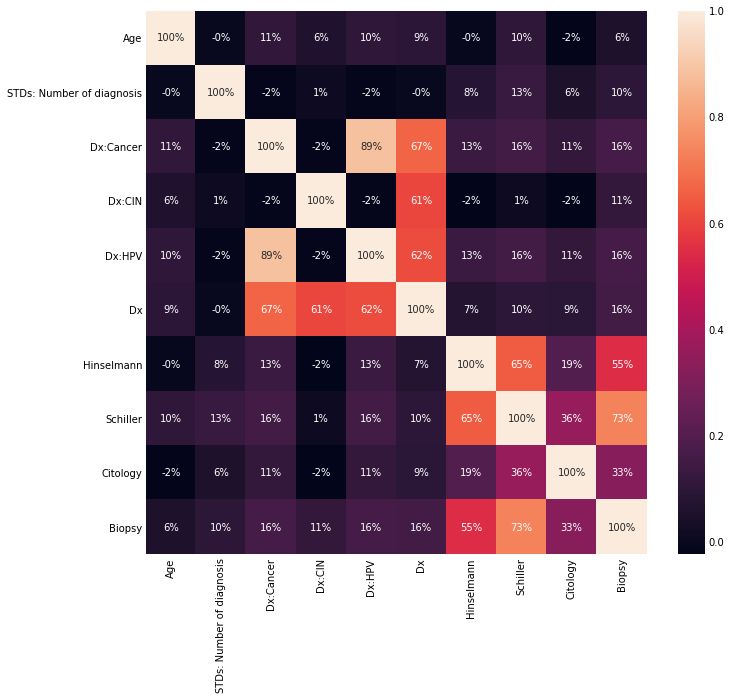

In [ ]:
#Plotting heat correlation map. 
plt.figure(figsize = (10,10))
sns.heatmap(newData.corr(), annot=True, fmt = '.0%')

##1.4- Describe in detail how you deployed your agent and adjusted its parameters. You may use open source code and libraries as long as you acknowledge them

Different steps are important when it comes to deploying the agent, after understanding, cleaning, and pre-processing the data, it is now important to divide the dataset into X and Y to differentiate the normal features from the target feature, this is done below using the “iloc” function which returns Pandas series by choosing the appropriate columns that will be included in the X and Y. The X includes all the columns available in the dataset excluding the target feature which is set to be the “Biopsy”, the Y only include the target feature “Biopsy”. 

In [ ]:
#Splitting the features from the target variable Y (Biopsy)
X_col = newData.iloc[:,:33]
Y_col = newData.iloc[:,33]

print(X_col.shape)
print(Y_col.shape)

(858, 33)
(858,)


In [ ]:
X_col.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology'],
      dtype='object')

By looking at the datatypes previously, it can be visualised that many columns are of type “Object”, those columns are presented with numbers in the dataset, therefore, those columns types are changed using the Pandas library, using the pd.to_numeric function. Looking at the code below, it can be seen that no columns are with data type object and the datatypes are converted to be Float64.

In [ ]:
X_col.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [ ]:
#Changing all datatypes from Object to Float64
X_col['Number of sexual partners'] = pd.to_numeric(X_col['Number of sexual partners'])
X_col['First sexual intercourse'] = pd.to_numeric(X_col['First sexual intercourse'])
X_col['Num of pregnancies'] = pd.to_numeric(X_col['Num of pregnancies'])
X_col['Smokes'] = pd.to_numeric(X_col['Smokes'])
X_col['Smokes (years)'] = pd.to_numeric(X_col['Smokes (years)'])
X_col['Smokes (packs/year)'] = pd.to_numeric(X_col['Smokes (packs/year)'])
X_col['Hormonal Contraceptives'] = pd.to_numeric(X_col['Hormonal Contraceptives'])
X_col['Hormonal Contraceptives (years)'] = pd.to_numeric(X_col['Hormonal Contraceptives (years)'])
X_col['IUD'] = pd.to_numeric(X_col['IUD'])
X_col['IUD (years)'] = pd.to_numeric(X_col['IUD (years)'])
X_col['STDs'] = pd.to_numeric(X_col['STDs'])
X_col['STDs (number)'] = pd.to_numeric(X_col['STDs (number)'])
X_col['STDs:condylomatosis'] = pd.to_numeric(X_col['STDs:condylomatosis'])
X_col['STDs:cervical condylomatosis'] = pd.to_numeric(X_col['STDs:cervical condylomatosis'])
X_col['STDs:vaginal condylomatosis'] = pd.to_numeric(X_col['STDs:vaginal condylomatosis'])
X_col['STDs:vulvo-perineal condylomatosis'] = pd.to_numeric(X_col['STDs:vulvo-perineal condylomatosis'])
X_col['STDs:syphilis'] = pd.to_numeric(X_col['STDs:syphilis'])
X_col['STDs:pelvic inflammatory disease'] = pd.to_numeric(X_col['STDs:pelvic inflammatory disease'])
X_col['STDs:genital herpes'] = pd.to_numeric(X_col['STDs:genital herpes'])
X_col['STDs:molluscum contagiosum'] = pd.to_numeric(X_col['STDs:molluscum contagiosum'])
X_col['STDs:AIDS'] = pd.to_numeric(X_col['STDs:AIDS'])
X_col['STDs:HIV'] = pd.to_numeric(X_col['STDs:HIV'])
X_col['STDs:Hepatitis B'] = pd.to_numeric(X_col['STDs:Hepatitis B'])
X_col['STDs:HPV'] = pd.to_numeric(X_col['STDs:HPV'])

In [ ]:
X_col.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

Using the Sklearn library the dataset is split to the train and testing sets, where in this cell, it is specified that the dataset is divided into 70% training and 30% for testing. 

In [ ]:
#Training and testing samples
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_col, Y_col, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((600, 33), (258, 33))

In [ ]:
data_disp, labels_disp = shap.datasets.adult(display=True)
X_train_disp, X_test_disp, Y_train_disp, Y_test_disp = train_test_split(data_disp, labels_disp, test_size=0.3, random_state=42)
X_train_disp.shape, X_test_disp.shape

((22792, 12), (9769, 12))

In [ ]:
newData, labels = shap.datasets.adult(display=True)
labels = np.array([int(label) for label in labels])
newData.shape, labels.shape

((32561, 12), (32561,))

As stated earlier, the XGBoost algorithm is used is used to train and fit the data, therefore looking at the code below, the XGB library is imported and parameters such as the number of estimators which is introduced to pick the most accurate data model, as well as the maximum depth which controls the maximum depth of the tree to avoid overfitting. 


(Referenced from the TUTORIAL)

In [ ]:
#XGBoost Algorithm
%%time
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)

model.fit(X_train, Y_train)

CPU times: user 411 ms, sys: 11.5 ms, total: 422 ms
Wall time: 545 ms


In [ ]:
Y_predict = model.predict(X_test)
Y_predict[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The next step is to visualise the performance of the data after it being fitted in the XGB model, by looking at the model performance in the cell below, where 0 means no cervical cancer and 1 means cervical cancer is true, it is seen that the model accuracy reached 95.7% with 98% precision for no-cancer risk patients and 64% for patients with cancer risk. 

In [ ]:
class_labels = list(set(labels))
meu.display_model_performance_metrics(true_labels=Y_test, predicted_labels=Y_predict, classes=class_labels)

Model Performance metrics:
------------------------------
Accuracy: 0.9574
Precision: 0.9561
Recall: 0.9574
F1 Score: 0.9567

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.64      0.60      0.62        15

    accuracy                           0.96       258
   macro avg       0.81      0.79      0.80       258
weighted avg       0.96      0.96      0.96       258


Prediction Confusion Matrix: - Error - Please Proceed


##1.5- Describe in detail how you deployed your SHAP explanation features with the deployed agent. You may use open source code and libraries as long as you acknowledge them

When dealing with a medical dataset, the implementation of SHAP values.This section will be showing different SHAP plots that explain will be explaining the most important features for individuals patients. 

The code below explains the SHAP tree explainer function, which is an accurate method for estimating SHAP values using the tree model and batch plots under various assumptions [3].



Reference [3]: https://github.com/slundberg/shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

Looking at the code and figure below, the features that each contribute to pushing the model output from the base value to the model output are the case for a patient with specific features given under the blue presentation below the SHAP plot for a patient with the following specifications such as the age of 16 and zero diagnosis of STD, very less likely to be diagnosed with cervical cancer. 


The only small feature that might affect the patient and predict it might get cervical cancer is plotted in pink and it is the number of pregnancies = 1. 
 

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Below is another representation for another patient where it can be seen that this woman is more likely to be diagnosed with cevrical cancer depending on the values of the features, this patient is more threatened given the predictions by our algorithm. 


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[5,:], X_test.iloc[5,:])

The graph below is another SHAP plot, that shows the impact of different features on the output of the model. It can be visualised that the Schiller can be seen to have the most effect on different patients as well as the age. It can also be seen that the smoking has the less impact on the output of the model.

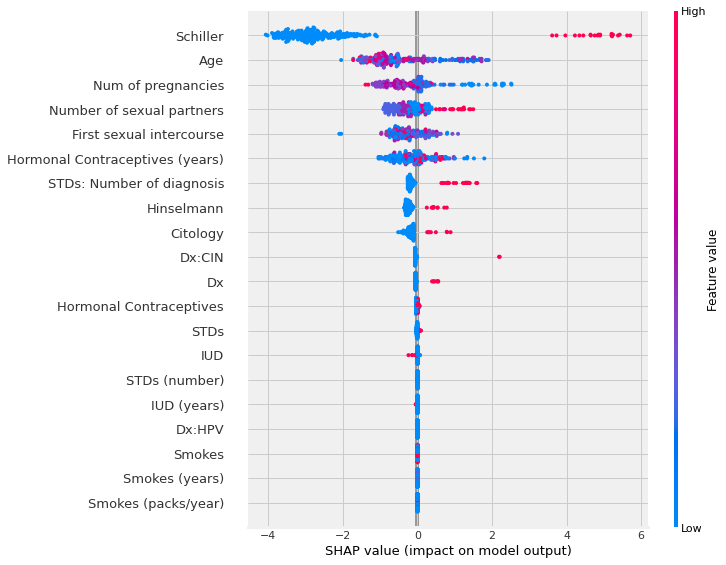

In [ ]:
shap.summary_plot(shap_values,X_test)

As the figure above showed the exact values that impact the output of the model using the given features; the bar plot below shows the average impace on the output model, where the same results can be obtained as the Schiller has the most effect on predicting cervical cancer for different patients and smoking has the least effect on the output of the model

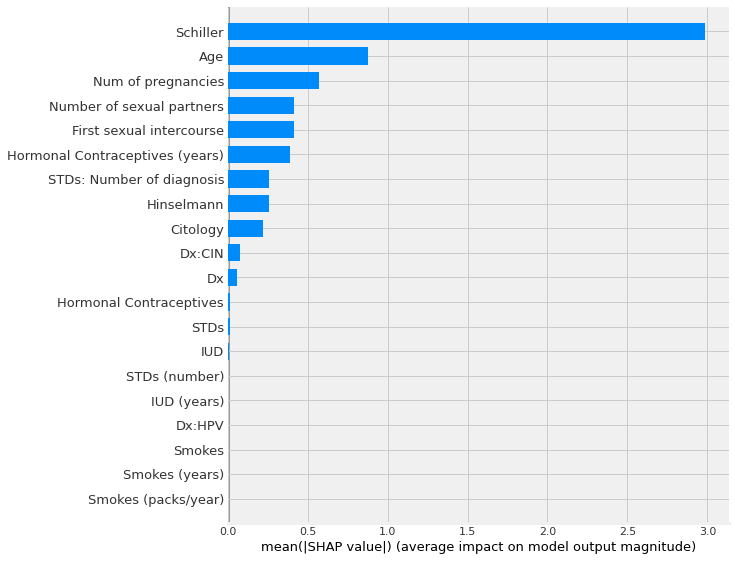

In [ ]:
shap.summary_plot(shap_values, X_col, plot_type="bar")

To understand how a selected feature effects the output of the model we can plot the SHAP value of that feature than to the value of the feature for all the examples in a dataset. Because SHAP values represent the responsibility of a feature for a change in the output of the model, the plot below represents the change in the predicted features effect to each other. Vertical dispersion at a single feature reflects interaction effects with other characteristics.

The next SHAP plot below is a very interesing live visualisation of the features effects on each other, where it is possible to changes the features for both axis and easily visualise how each feature such as Age has effect on other features. 



In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

For each sample, we can plot the SHAP values of each feature to get an overview of which features affective to the output of the model. The plot below shows the sum of SHAP value effect over all samples and uses SHAP values to demonstrate the distribution of the impacts on the model output of each feature. 

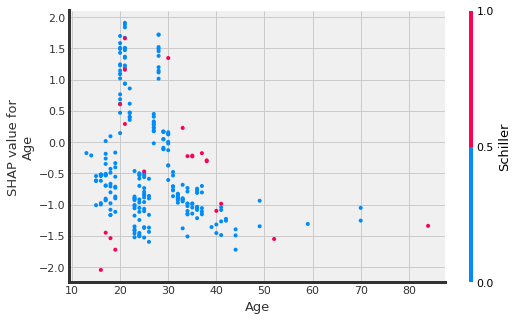

In [ ]:
shap.dependence_plot("Age", shap_values, X_test)

##1.6- Explain what features have a higher probability of influencing a decision and discuss why this is the case from the context of the provided datasets.

In this section, it is important to understand which features are the most important on an average of the output of the model. Feature importance is needed to determine which features in the dataset have the most effect on the Biopsy target variable which determines if a woman will be diagnosed with Cevrical Cancer in the mean future or no. 

The first step below is the print a table that includes all the features in the dataframe, each feature has a score which shows its importance, where it is a score between 0 and 1. 

By looking at the printed table, it can be seen that the Age has the most effect and is the most important feature, unlike the citology, which is the least important feature and won't have a strong effect on the target variabel Biopsy. 

In [ ]:
#Evaulating which features the classifier finds important for making its decisions
feats = model.feature_importances_

#Create new instance of dataframe
feat_importances=pd.DataFrame()

#set columns in datafram to features and their importances
feat_importances["feature"]=X_col.columns
feat_importances["importance"]=feats

#Display data
feat_importances

,feature,importance
0,Age,0.020325
1,Number of sexual partners,0.017716
2,First sexual intercourse,0.019448
3,Num of pregnancies,0.024272
4,Smokes,0.000000
5,Smokes (years),0.000000
6,Smokes (packs/year),0.000000
7,Hormonal Contraceptives,0.007800
8,Hormonal Contraceptives (years),0.018843
9,IUD,0.073335


After printing a table including the feature importances, there are many ways on how the feature importances can be determined, the section below includes three different plots where:

-- Feature Weight: Where the each feature weight effect is plotted on the graph, it can be determined that the feature with the strongest weight and effect on the dataset is the Age with a score of 715 and the least is the IUD (years) with a score of 1. 

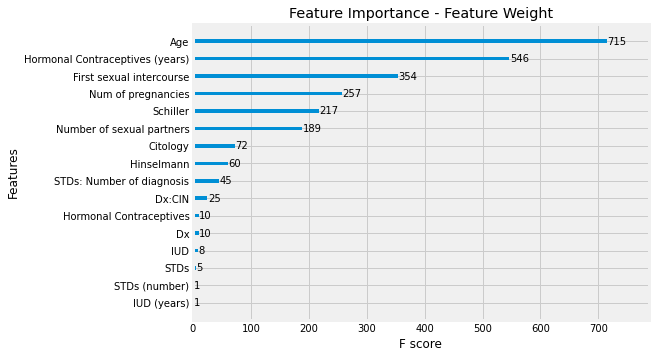

In [ ]:
fig = plt.figure(figsize = (16, 12))

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(model, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

The second plot below determines the feature importance after implementing the XGBoost algorithm using the "Split Mean Gain". The gain is an important way to determine the features. 

The gain means the proportional relationship with the dependent variable of the related function of the model, determined by taking the contribution of each feature for each tree in the model. As compared to another function, a higher value of this metric means it is more important for a prediction to be made.

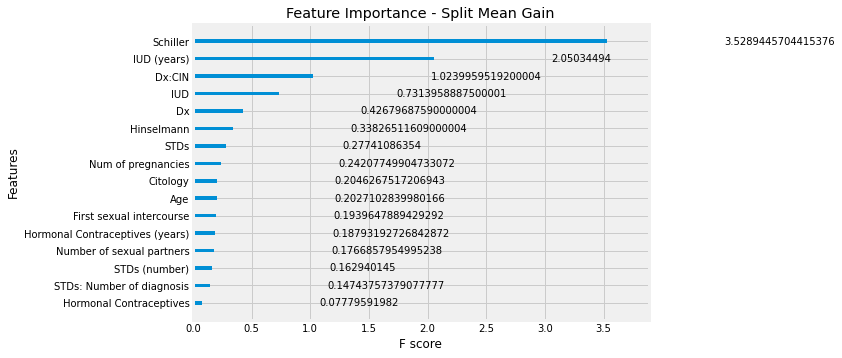

In [ ]:
fig = plt.figure(figsize = (16, 12))

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(model, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")


The sample coverage is based on the average distribution of breaks using the function (number of samples affected) when using the XGBoost algorithm. 

Looking at the plot, determining the feature importance using the sample coverage it can be seen that the CIN feature is the most important with a value of 72.7%. The least important feature using the sample coverage is the number of STD diagnosed, which is only given to be 2.31%. 

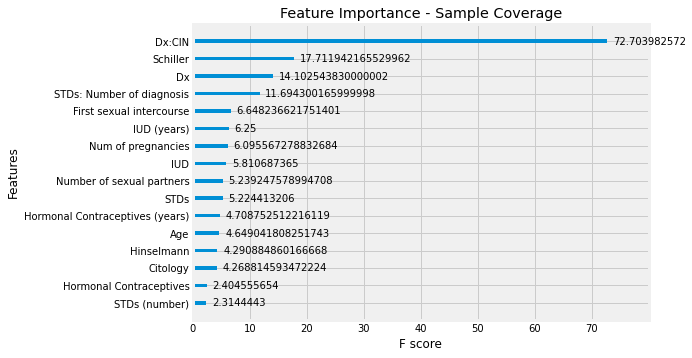

In [ ]:
fig = plt.figure(figsize = (16, 12))

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(model, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")